In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, BatchNormalization, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout,AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pylab as plt
import scipy.io
import numpy as np
import pandas as pd
from skimage.transform import resize
import pywt


In [ ]:
img_train_dir = '/content/drive/MyDrive/소캡디/Aro/CWT_train_aro'
img_val_dir = '/content/drive/MyDrive/소캡디/Aro/CWT_val_aro'
img_test_dir = '/content/drive/MyDrive/소캡디/Aro/CWT_test_aro'

In [ ]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator


np.random.seed(1234)
train_data_generator_ag = ImageDataGenerator(rescale = 1./255)
val_data_generator_ag = ImageDataGenerator(rescale = 1./255)
test_data_generator_ag = ImageDataGenerator(rescale = 1./255)

train_data_generator = train_data_generator_ag.flow_from_directory(img_train_dir,
                                                                   target_size = (299,299),
                                                                   color_mode = 'rgb',
                                                                   shuffle = True,
                                                                   batch_size = 16,
                                                                   class_mode = 'binary')

val_data_generator = val_data_generator_ag.flow_from_directory(img_val_dir,
                                                               target_size = (299, 299),
                                                               color_mode = 'rgb',
                                                               shuffle = True,
                                                               batch_size = 16,
                                                               class_mode = 'binary')

test_data_generator = test_data_generator_ag.flow_from_directory(img_test_dir,
                                                               target_size = (299, 299),
                                                               color_mode = 'rgb',
                                                               shuffle = True,
                                                               batch_size = 16,
                                                               class_mode = 'binary')

Found 6877 images belonging to 2 classes.
Found 859 images belonging to 2 classes.
Found 860 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
import urllib.request


weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)

# Model 초기화하기
inception_v3_basic = InceptionV3(input_shape=(299, 299, 3),
                                include_top=False,
                                weights=None)

# pre-trained weights 가져오기
inception_v3_basic.load_weights(weights_file)

# layer를 freeze하기
for layer in inception_v3_basic.layers:
    layer.trainable = False

"\ninception_v3_basic = InceptionV3(input_shape=(299,299,3), weights='imagenet', include_top=False)\n\nfor layer in inception_v3_basic.layers:\n    layer.trainable = False\n    \n#inception_v3_basic.summary()\n"

In [ ]:
from keras import regularizers

inception_v3_basic_out = inception_v3_basic.output
inception_v3_basic_out = Flatten()(inception_v3_basic_out)

x = Dense(1024, activation='relu')(inception_v3_basic_out)
x = Dropout(0.5)(x)

x = Dense(1, activation='sigmoid')(x)

model = Model(inputs= inception_v3_basic.input, outputs = x)
#model.summary()

Epoch 1/300
429/429 [==============================] - 2175s 5s/step - loss: 0.9160 - binary_accuracy: 0.5264 - val_loss: 0.6852 - val_binary_accuracy: 0.5425
Epoch 2/300
429/429 [==============================] - 49s 113ms/step - loss: 0.6857 - binary_accuracy: 0.5532 - val_loss: 0.6916 - val_binary_accuracy: 0.5059
Epoch 3/300
429/429 [==============================] - 47s 110ms/step - loss: 0.6802 - binary_accuracy: 0.5574 - val_loss: 0.6708 - val_binary_accuracy: 0.5767
Epoch 4/300
429/429 [==============================] - 47s 109ms/step - loss: 0.6712 - binary_accuracy: 0.5705 - val_loss: 0.6653 - val_binary_accuracy: 0.5755
Epoch 5/300
429/429 [==============================] - 47s 109ms/step - loss: 0.6624 - binary_accuracy: 0.5836 - val_loss: 0.6630 - val_binary_accuracy: 0.5920
Epoch 6/300
429/429 [==============================] - 47s 109ms/step - loss: 0.6588 - binary_accuracy: 0.5882 - val_loss: 0.6769 - val_binary_accuracy: 0.5684
Epoch 7/300
429/429 [====================

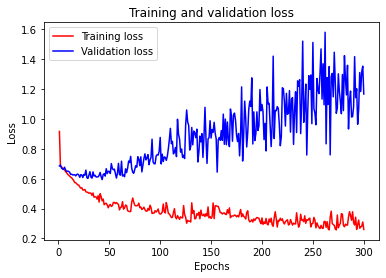

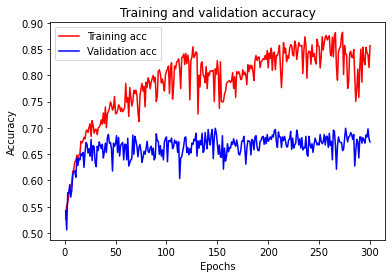

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics= ['binary_accuracy'])
history_model = model.fit(train_data_generator, batch_size=16,epochs=300, steps_per_epoch=6878//16, validation_data = val_data_generator, validation_steps=859//16)
model.save('/each_aro_1024.h5')
import matplotlib.pyplot as plt
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')      # bo -> 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss') # b -> 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history_model.history['binary_accuracy']           # 훈련 정확도
val_acc = history_model.history['val_binary_accuracy']   # 검증 정확도

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 
